## 3-2. 브라우저 자동화하기, Selenium

- `Selenium`을 활용해 브라우저를 조작해봅시다.

### Selenium 라이브러리

- `selenium`은 Python을 이용해서 웹 브라우저를 조작할 수 있는 자동화 프레임워크입니다.

이를 사용하기 위해서는 먼저 `selenium` 프레임워크를 설치해야합니다.  
`pip install`을 통해서 이를 간단하게 설치할 수 있습니다.

> Tip: `%`를 이용해서 노트북(.ipynb) 환경에서 터미널 코드를 실행할 수 있습니다.

In [3]:
# %pip install selenium

설치를 다 진행했다면, 이제 Chrome Driver를 설치하러 가봅시다.

### Web Driver

- 웹 브라우저와 연동을 위해서는 `WebDriver`가 필요합니다.

`WebDriver`는 웹 브라우저를 제어할 수 있는 자동화 프레임워크입니다.  
이 실습에서는 **Chrome**을 기준으로 설명하겠습니다.

`pip insall`을 통해 webdriver를 관리하는 라이브러리 `webdriver-manager`를 설치합니다.

In [4]:
# %pip install webdriver-manager

설치를 완료했다면 이제 Webdriver를 사용할 수 있습니다.

컴퓨터에 Chrome이 깔려있어야 이후 실습을 진행할 수 있습니다.  
[Chrome 설치하기](https://www.google.com/intl/ko_kr/chrome/)

### Selenium 시작하기



Selenium을 사용하기 위해 우선 Selenium을 불러와봅시다.

In [7]:
# selenium으로부터 webdriver 모듈을 불러옵니다.

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

불러온 모듈 webdriver에서 Chrome() 객체를 생성합니다.

In [6]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

갑자기 크롬이 실행된다구요? 정상입니다. 저희는 위 명령을 통해 웹 브라우저를 실행하고 파이썬과 연동할 수 있습니다.

여기서 그치지 않고, 저희는 이제 요청을 보내보도록 하겠습니다.  
`.get(url)`을 활용해 요청을 보낼 수 있습니다.

In [14]:
# http://www.example.com 으로 요청을 보내봅시다.

driver.get("http://www.example.com")

요청이 잘 보내지시나요?  :)  
응답을 받은 후, `page_source` 속성을 통해 Response의 HTML 문서를 확인할 수 있습니다.

<html lang="ko" class="fzoom" data-dark="false"><head><script async="" src="https://ntm.pstatic.net/ex/nlog.js"></script><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="h
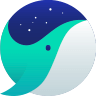
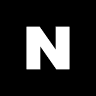

In [13]:
# page_source 속성을 확인해봅시다.
print(driver.page_source)

그런데, 프로그램들을 실행하다보면 Chrome 창이 계속 켜져있게 됩니다.
이는 저희가 해당 창을 끄라고 명령을 내린 적이 없기 때문이죠!

`with-as` 구문을 통해 주어진 명령이 끝나면 driver를 종료하도록 설정할 수 있습니다.

In [16]:
# with-as를 사용해서 위 코드를 다시 적어봅시다.

with webdriver.Chrome(service=Service(ChromeDriverManager().install())) as driver :
    driver.get("http://www.example.com")
    print(driver.page_source)

<html><head>
    <title>Example Domain</title>

    <meta charset="utf-8">
    <meta http-equiv="Content-type" content="text/html; charset=utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domain is for use in illustr

주어진 명령을 실행하고 잘 종료되는 것을 확인할 수 있습니다.

----

### Driver에서 특정 요소 추출하기

selenium은 받아온 응답으로부터 특정 요소를 추출할 수도 있습니다.  
**이미 브라우저를 활용하기 때문이죠!**

응답을 가지고 있는 driver/요소에 대해서 다음과 같은 메서드를 적용할 수 있습니다.

**요소 하나 찾기**  
- `.find_element(by, target)`
  - `by` : 대상을 찾는 기준 : `ID`, `TAG_NAME`, `CLASS_NAME`, ...
  - `target` : 대상의 속성  

**요소 여러개 찾기**  
- `.find_elements(by, target)`
  - `by` : 대상을 찾는 기준 : `ID`, `TAG_NAME`, `CLASS_NAME`, ...
  - `target` : 대상의 속성

In [18]:
#By를 import
#By를 통해 특정 기준 설정

from selenium.webdriver.common.by import By

In [21]:
# p 태그에 해당하는 요소 하나를 찾아봅시다.

with webdriver.Chrome(service=Service(ChromeDriverManager().install())) as driver :
    driver.get("http://www.example.com")
    print(driver.find_element(By.TAG_NAME, "p").text)

This domain is for use in illustrative examples in documents. You may use this domain in literature without prior coordination or asking for permission.


In [27]:
# p 태그에 해당하는 요소 여러개를 찾아봅시다.

with webdriver.Chrome(service=Service(ChromeDriverManager().install())) as driver :
    driver.get("http://www.example.com")
    for element in driver.find_elements(By.TAG_NAME, "p") :
        print("Text :", element.text)

Text : This domain is for use in illustrative examples in documents. You may use this domain in literature without prior coordination or asking for permission.
Text : More information...
